In [1]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
ds1 = pd.read_csv('../data/external/BankAnalysis.csv', sep=",", encoding='utf-8') 
ds1.pop(ds1.columns[0])

0            0
1            1
2            2
3            3
4            4
         ...  
11157    11157
11158    11158
11159    11159
11160    11160
11161    11161
Name: Unnamed: 0, Length: 11162, dtype: int64

# New Section

In [5]:
ds1.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome,duration(in minutes)
0,59.0,0,0.908149,1,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
1,56.0,0,-0.794565,0,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
2,41.0,0,0.113105,1,0,5,1,-1.0,0,1,5,1,2,1,1,1,17
3,55.0,0,1.006696,1,0,5,1,-1.0,0,1,4,1,2,1,1,1,9
4,54.0,0,-0.691572,0,0,5,2,-1.0,0,1,7,1,4,1,1,1,11


In [6]:
ds1.shape

(11162, 17)

In [7]:
x = ds1.drop('deposit',axis = 1) 
y = ds1['deposit']

In [8]:
# creating the object

ec = ExtraTreesClassifier()

In [9]:
ec.fit(x,y) # applying the classifier

ExtraTreesClassifier()

In [10]:
ec.feature_importances_

array([0.07415921, 0.00271604, 0.07108962, 0.03405449, 0.01498347,
       0.07708108, 0.0506037 , 0.0302662 , 0.01568791, 0.05400116,
       0.02554269, 0.03273208, 0.0455916 , 0.11315719, 0.05489318,
       0.30344038])

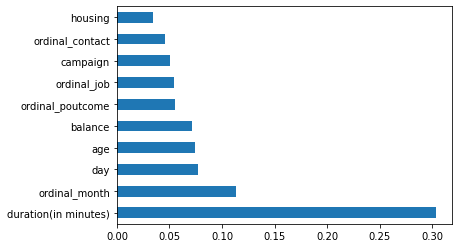

In [11]:
# plotting the scores and values

f_s = pd.Series(ec.feature_importances_, index = x.columns, name = 'features')
fs = f_s.nlargest(10).plot(kind = 'barh')

In [12]:
fss = f_s.nlargest(10) # copying the series

In [13]:
fss.index

Index(['duration(in minutes)', 'ordinal_month', 'day', 'age', 'balance',
       'ordinal_poutcome', 'ordinal_job', 'campaign', 'ordinal_contact',
       'housing'],
      dtype='object')

In [14]:
ds2 = ds1[fss.index] # making a data frame of only selected features

In [15]:
ds2.head() # seeing the results

,duration(in minutes),ordinal_month,day,age,balance,ordinal_poutcome,ordinal_job,campaign,ordinal_contact,housing
0,17,1,5,59.0,0.908149,1,7,1,1,1
1,17,1,5,56.0,-0.794565,1,7,1,1,0
2,17,1,5,41.0,0.113105,1,5,1,1,1
3,9,1,5,55.0,1.006696,1,4,1,1,1
4,11,1,5,54.0,-0.691572,1,7,2,1,0


In [16]:
# separating x and y
X = ds2[:] 
Y = ds1['deposit']

In [17]:
# splitting data in train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=111)

In [18]:

def dt(x_train,y_train, x_test, y_test):

    dct = DecisionTreeClassifier()
    m_sv = dct.fit(x_train,y_train)
    y_hat = m_sv.predict(x_test)
    print('accuracy of decison tree is:',accuracy_score(y_test, y_hat))
    print(classification_report(y_test, y_hat))
    cm = confusion_matrix(y_test, y_hat)
    print(cm)


In [19]:
dt(x_train,y_train,x_test,y_test)

accuracy of decison tree is: 0.7859381997313032
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.77      0.77      0.77      1044

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

[[947 242]
 [236 808]]


### If you dump complete function, then you have to call complete model

In [20]:
def rf(x_train, y_train, x_test, y_test):

    #rff = RandomForestClassifier()
    rff = RandomForestClassifier(max_depth=10,n_estimators=20)
    rf1 = rff.fit(x_train,y_train)
    y_hat = rf1.predict(x_test)
    print('accuracy of random forest is',accuracy_score(y_test, y_hat))
    print(classification_report(y_test, y_hat))
    cm = confusion_matrix(y_test, y_hat)
    with open('saved_rf_model.pkl', 'wb') as wr:
      pickle.dump(rf1, wr)
    return rf1
        

In [21]:
rf(x_train,y_train,x_test,y_test)

accuracy of random forest is 0.8401253918495298
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1189
           1       0.80      0.88      0.84      1044

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



RandomForestClassifier(max_depth=10, n_estimators=20)

In [22]:
x_2 = x_train[1:2]
y_2 = y_train[1:2]

In [23]:
type(x_2)

pandas.core.frame.DataFrame

In [24]:
x_2

,duration(in minutes),ordinal_month,day,age,balance,ordinal_poutcome,ordinal_job,campaign,ordinal_contact,housing
7667,2,3,16,57.0,0.452462,1,4,1,2,1


In [25]:
model =  pickle.load(open('saved_rf_model.pkl', 'rb'))
#model =  pickle.load(open('saved_rf.pkl', 'rb'))
model.predict(x_2)

array([0], dtype=int64)

In [26]:
y_2

7667    0
Name: deposit, dtype: int64